In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/salary-predictor/wage_predict.csv


In [2]:
##Loading the data
df = pd.read_csv('/kaggle/input/salary-predictor/wage_predict.csv')

In [3]:
df.describe()

,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,...,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,4.078304,13.877805,1.520200,9.310723,4.104738,3.316209,2.762594,1.385536,2.296758,0.636908,...,3.841397,3.275312,4.252868,3.126185,3.364589,4.402993,1.186035,1.819950,1.378554,4393.986833
std,2.472676,2.767168,0.499716,3.059247,2.605844,1.682291,1.701384,0.621063,0.865284,1.133255,...,1.403511,1.432797,1.121108,1.300828,1.733848,1.275906,0.389232,1.267985,0.864491,4679.512869
min,0.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,34.666667
25%,2.000000,12.000000,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,2.000000,4.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1859.000000
50%,3.000000,13.000000,2.000000,9.000000,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,...,4.000000,3.000000,5.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,3253.466667
75%,5.000000,16.000000,2.000000,12.000000,6.000000,5.000000,5.000000,2.000000,3.000000,1.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,2.000000,2.000000,5458.333333
max,15.000000,21.000000,2.000000,15.000000,9.000000,5.000000,5.000000,3.000000,3.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,3.000000,68553.330000


In [4]:
df.head()

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333


In [5]:
##Lets check data types of all the columns
df.dtypes

industry                  object
occupation                 int64
yrs_qual                   int64
sex                        int64
highest_qual               int64
area_of_study              int64
influencing                int64
negotiating                int64
sector                     int64
workforce_change           int64
no_subordinates            int64
choose_hours               int64
choose_method              int64
job_quals                  int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                   int64
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

We would only need to handle(encode) industry column here. Other columns are integer 

In [6]:
## Lets check for null values
df.isnull().sum() #checking for total null values

industry                 0
occupation               0
yrs_qual                 0
sex                      0
highest_qual             0
area_of_study            0
influencing              0
negotiating              0
sector                   0
workforce_change         0
no_subordinates          0
choose_hours             0
choose_method            0
job_quals                0
qual_needed              0
experience_needed        0
keeping_current          0
satisfaction             0
advising                 0
instructing              0
problem_solving_quick    0
problem_solving_long     0
labour                   0
manual_skill             0
computer                 0
group_meetings           0
computer_level           0
monthly_salary           0
dtype: int64

No null values! Great! :) 


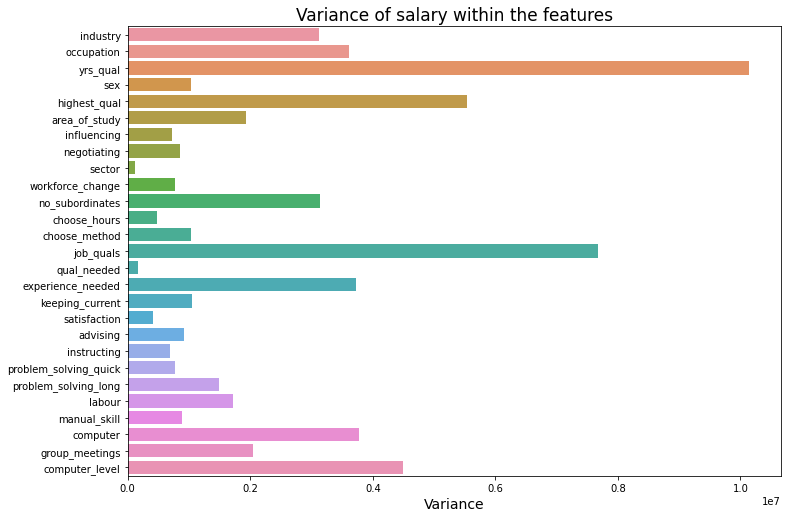

In [39]:
## Lets also check variance of each column
importance = pd.DataFrame([], columns=df.columns[:-1])


for column in df.columns[:-1]:
    importance.loc[0, column] = df[[column, 'monthly_salary']].groupby(by=column).mean().var(axis=0)[0]
    
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
    
var = sns.barplot(ax= ax, data=importance, orient = 'h').set_title('Variance of salary within the features', fontsize=17)

ax.set_xlabel('Variance', fontsize=14);

Lets get started by encoding categorical column

In [7]:
from sklearn.preprocessing import LabelEncoder
df_encode = df.copy()
le = LabelEncoder()
le.fit(df.industry.drop_duplicates()) 
df_encode.industry = le.transform(df.industry)

The data is ready now! Now lets start by looking into correlation of the columns

In [8]:
##correlation with monthly salary
df.corr()['monthly_salary'].sort_values()

occupation              -0.310783
labour                  -0.230007
computer                -0.228721
sex                     -0.153975
workforce_change        -0.126288
manual_skill            -0.097683
satisfaction            -0.087306
qual_needed             -0.016675
keeping_current          0.036651
sector                   0.055335
instructing              0.092313
choose_hours             0.121878
problem_solving_quick    0.121931
negotiating              0.138491
choose_method            0.141761
influencing              0.143848
advising                 0.151079
area_of_study            0.163244
problem_solving_long     0.207772
no_subordinates          0.229935
group_meetings           0.280340
computer_level           0.299391
experience_needed        0.305999
highest_qual             0.337447
yrs_qual                 0.368312
job_quals                0.421212
monthly_salary           1.000000
Name: monthly_salary, dtype: float64

<AxesSubplot:>

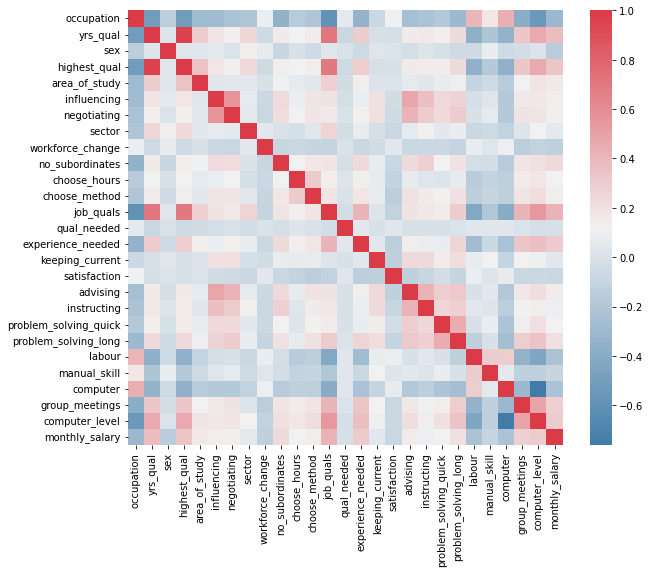

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

highest_qual is highly correlated with yrs_qual, which makes sense here because as in the description of data, the encoding has been done in the same order.


<AxesSubplot:xlabel='monthly_salary', ylabel='Density'>

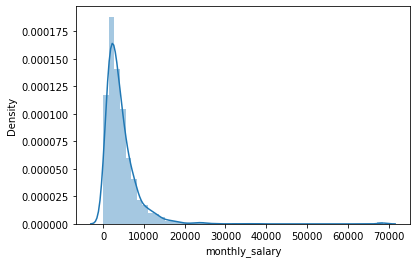

In [10]:

#Lets start with checking distribution of monthly salary
sns.distplot(df['monthly_salary'])

Here what we see is:
* Its not normally distributed
* Its skewed (positive)


In [11]:
#skewness
print("Skewness: %f" % df['monthly_salary'].skew())

Skewness: 6.389770


As we can see visually and statistically, our data is positively skewed

### Relationship of columns

We know most of our columns are numerical but they are categories according to their definition. we need to keep that in mind when we do this analysis

<AxesSubplot:xlabel='yrs_qual', ylabel='Density'>

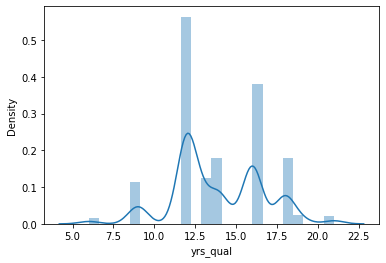

In [12]:
sns.distplot(df['yrs_qual'])

As our main focus is gender pay gap, we will try to focus on how different columns are distributed on the basis of gender also.

Lets see each column one by one

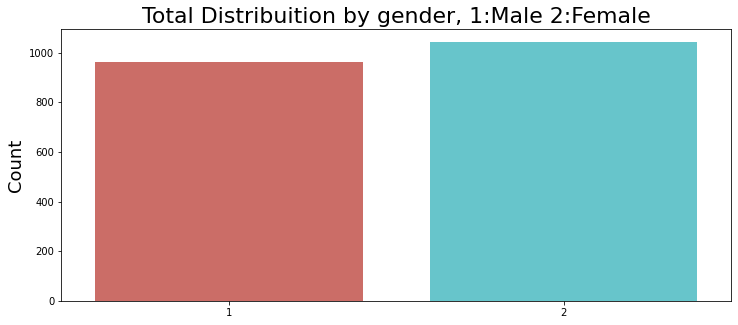

In [13]:
# Let see how gender distribution first
plt.figure(figsize=(12,5))

sns.countplot(x="sex", data=df,palette="hls")
plt.title('Total Distribuition by gender, 1:Male 2:Female', fontsize=22)
plt.xlabel('', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

This shows that male and female are almost equally distributed in our data(females slightly more). This means that our results and conclusions would not be biased on the basis of gender.

In [14]:
#printing the chance to survive by each title

def plot_function(col):
# figure size
    plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
    sns.countplot(x=col, data=df, palette="hls",
              hue="sex")
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.title("", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

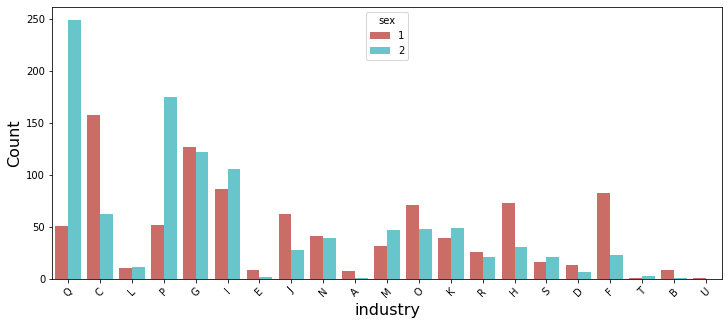

In [15]:
plot_function('industry')

As we know, 1 is Male and 2 is Female.
There are industries where we see huge difference in male and female population.
We can see males are more in Manufacturing(C), Information and communication(J), Transportation and storage(H), Construction(F) and Mining and quarrying(B).
We know that these industries are known to have more and so says the data.

The interesting thing is to find industries which have female are dominating, like Human health and social work activities(Q) and Education(P)

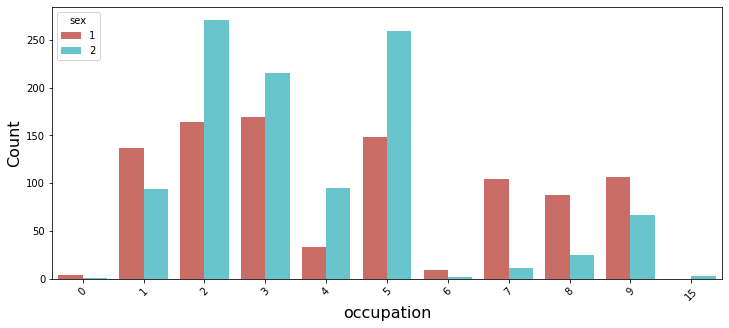

In [16]:
plot_function('occupation')

Here we can see, female are dominating for 2 - Professionals,3 - Technicians and associate professionals,4 - Clerks,5 - Service workers and shop and market sales workers.

While male dominating occupations are 1 - Legislators, senior officials and managers,7 - Craft and related trades workers,8 - Plant and machine operators and assemblers,9 - Elementary occupations

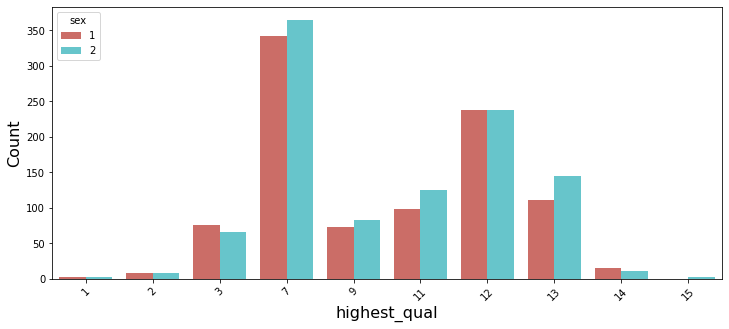

In [17]:
plot_function('highest_qual')

As we can see here, we have almost equal distribution of males and females in the different degrees. That means women are able to get higher education which is good.

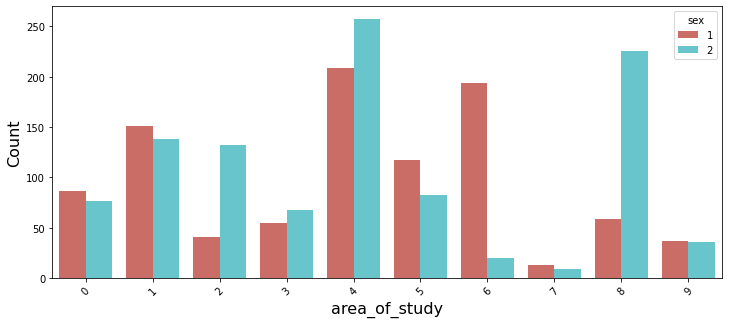

In [18]:
plot_function('area_of_study')

2(Teacher training and education science),4(Social sciences, business and law),8(Health and welfare) have a high number of females 
And 5(Science, mathematics and computing),6(Engineering, manufacturing and construction) have more males.


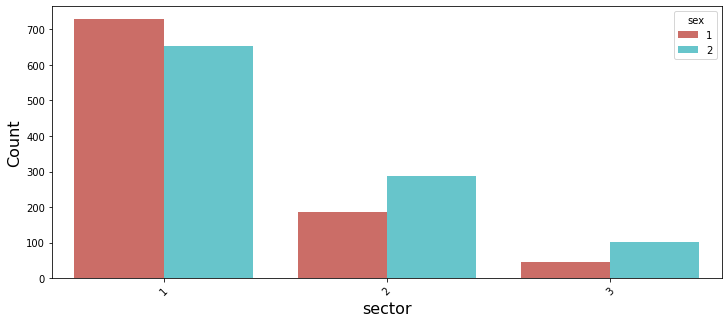

In [19]:
plot_function('sector')

We see The private sector (1) has more males while females are more in The public sector(2) and A non-profit organisation(3)

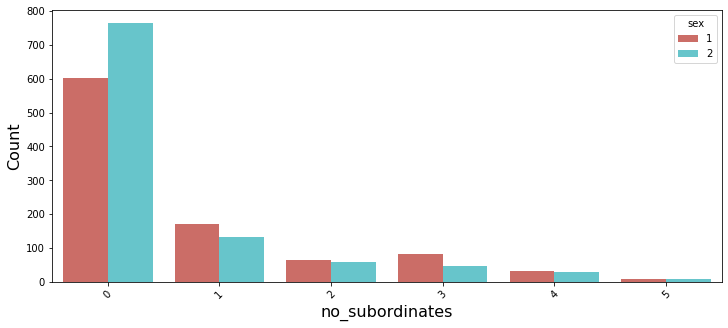

In [20]:
plot_function('no_subordinates')

Females are generally managing less number of people compared to males.

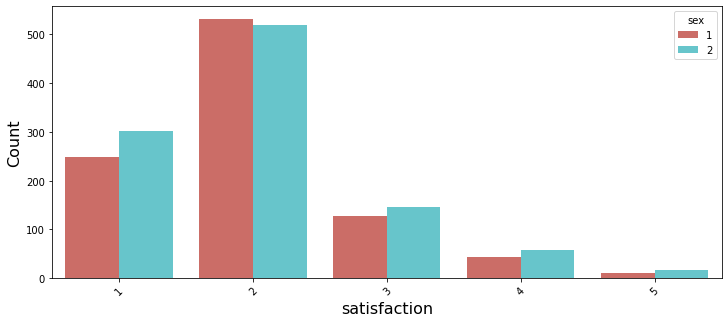

In [21]:
plot_function('satisfaction')

Females seem to be satisfied with their jobs.

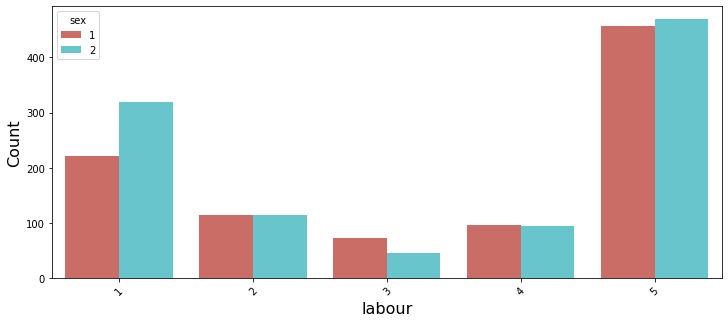

In [22]:
plot_function('labour')

Here we can see there are lot of people(both genders) who have to work physically for a long period daily

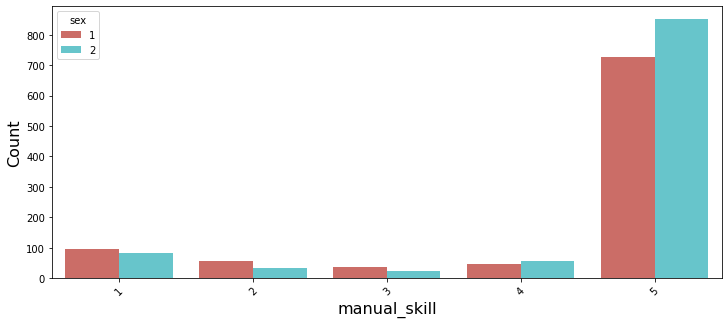

In [23]:
plot_function('manual_skill')

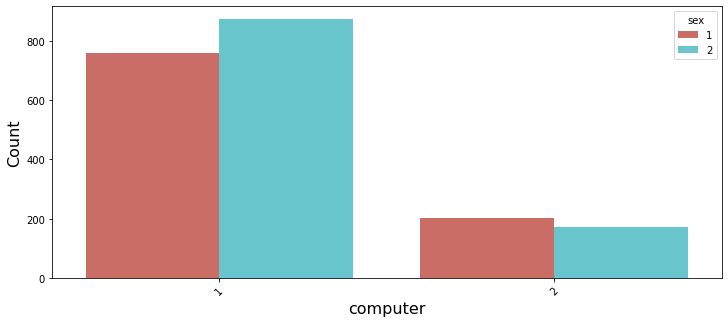

In [24]:
plot_function('computer')

Now lets see how is monthly salary distributed in different columns

In [25]:
def plot_salary(var):
    data = pd.concat([df['monthly_salary'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="monthly_salary", data=data)
    fig.axis(ymin=0, ymax=70000);

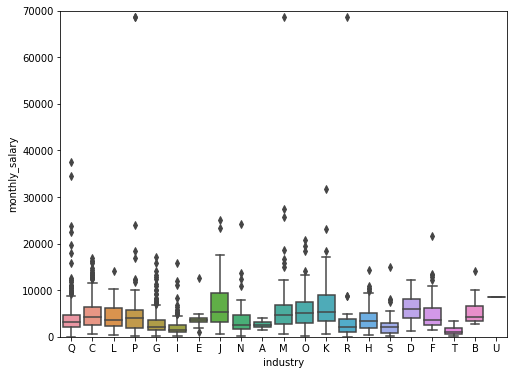

In [26]:
#box plot of industry/monthly_salary
plot_salary('industry')

J(Information and communication), K(Financial and insurance activities) and U(Activities of extraterritorial organizations and bodies) industry have higher salaries and S(Other service activities) and T(Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use) has low salary.

From distribution of gender in these sectors we see mostly male dominated industries seem to have higher salary.

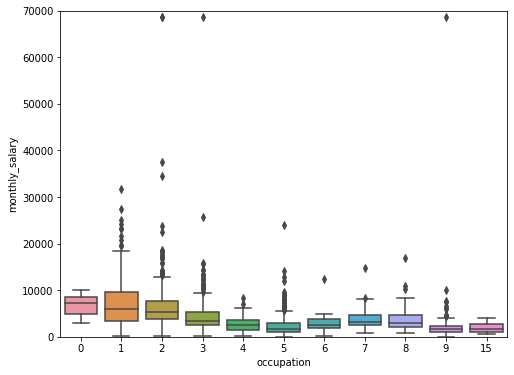

In [27]:
plot_salary('occupation')

Legislators, senior officials and managers(1) have higher salaries which is a male dominated occupation

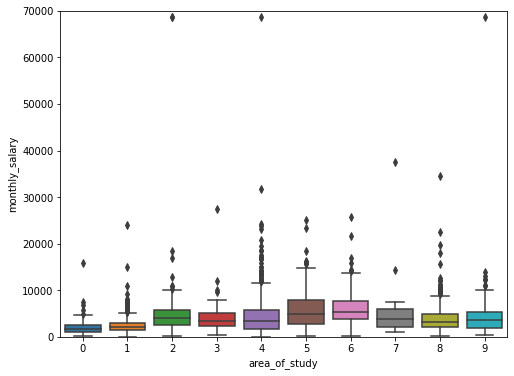

In [28]:
plot_salary('area_of_study')

05 Science, mathematics and computing
06 Engineering, manufacturing and construction  - have higher salaries and these are again male dominated.

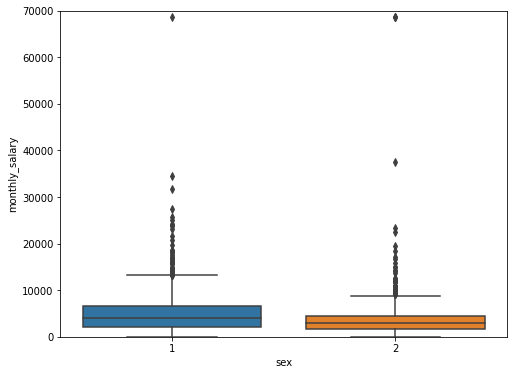

In [29]:
plot_salary('sex')

In [30]:
print(df.groupby("sex")["monthly_salary"].mean())


sex
1    5144.050426
2    3702.173624
Name: monthly_salary, dtype: float64


As we can see clearly males have higher salaries compared to females. We will also try to see the impact of sex in predicting salary using a ML model in the next steps.

### Model

In [31]:
!pip install shap

In [32]:
df_encode.iloc[:, :-1]

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level
0,16,2,19,1,13,4,2,1,1,3,...,2,5,4,5,4,4,5,1,1,2
1,2,9,14,1,11,7,4,2,1,1,...,3,5,3,5,3,4,5,1,1,1
2,11,3,16,2,12,4,2,1,1,3,...,2,3,1,4,2,1,5,1,1,2
3,16,5,12,2,7,4,5,4,2,1,...,2,5,2,5,2,5,5,2,1,0
4,15,1,18,1,13,4,3,4,3,3,...,2,4,2,5,4,1,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,13,3,12,2,7,8,4,5,1,1,...,2,5,5,5,3,1,5,1,5,2
2001,2,3,16,1,12,4,3,3,1,3,...,3,4,4,4,2,3,4,1,1,2
2002,16,1,18,2,13,4,4,1,2,2,...,4,4,4,4,3,2,5,1,2,2
2003,12,4,12,2,7,4,5,1,2,1,...,1,5,2,5,4,1,5,1,1,2


In [33]:
import pandas as pd
import shap
import sklearn

X = df_encode.iloc[:, :-1]
y = df_encode['monthly_salary']
# create a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

let's look at the coefficients

In [34]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

industry = -51.9846
occupation = -45.7819
yrs_qual = 746.7902
sex = -1217.7439
highest_qual = -517.6936
area_of_study = 91.4751
influencing = 76.1382
negotiating = 31.0816
sector = -43.0287
workforce_change = -270.1742
no_subordinates = 390.0302
choose_hours = 80.0257
choose_method = -3.2633
job_quals = 334.3132
qual_needed = 82.4725
experience_needed = 227.861
keeping_current = -7.997
satisfaction = -121.1296
advising = 49.9147
instructing = -130.9303
problem_solving_quick = 115.4073
problem_solving_long = 43.1157
labour = -100.832
manual_skill = 64.0268
computer = -526.3616
group_meetings = 210.5317
computer_level = -205.7627


Looking at coefficients above we can clearly see that column 'sex' is very important

Lets try to look into Shapely values
You can think of a Shapely value as how much a prediction changes when a new variable is added; how much value is added by each new variable.

The underlying math for Shapley values is extremely complex. However, in the case of linear regressions, they become much more simple to calulate.

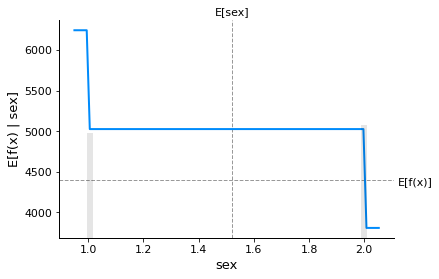

In [35]:
##Checking for sex
shap.partial_dependence_plot("sex", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True)

In [36]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

Permutation explainer: 2006it [02:19, 13.62it/s]                          


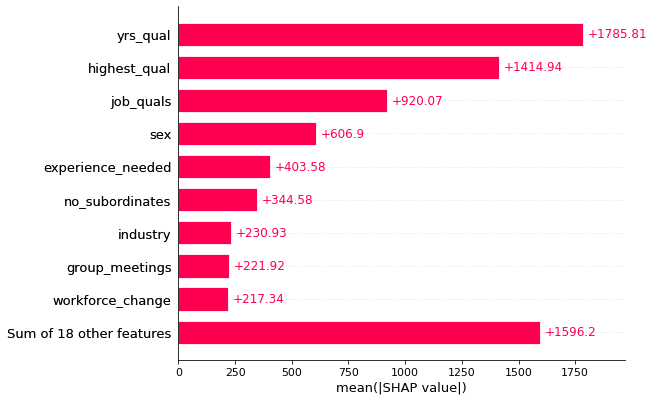

In [37]:
shap.plots.bar(shap_values)